## 영상정보처리 10주차 과제 템플리트
- 마감: 2021년 5월 14일 11시 59분
- 점수: 10점 만점
    
이름: 조민서            
학번: 32174224


In [ ]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive/MyDrive/ImageProcClass/Notebook-Week10/

Mounted at /gdrive
/gdrive/MyDrive/ImageProcClass/Notebook-Week10


# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

image_path = '../Dongkeun-OpenCV-ImgData/leaf.png'
image_path_noised = '../Dongkeun-OpenCV-ImgData/leaf-noise.png'

def show_img_with_matplotlib(color_img, title, pos):
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')

##문제 1
1. otsu's binarization에서 같이 사용하는 thresholding  방법론 THRESH_BINARY, THRESH_TRUC, THRESH_TOZERO 변경하여 사용 경우, 필터링으로 선작업을 하지 않은 결과에 어떤 영향을 미치는 지, 예시하는 프로그램과 결과를 간단하게 정리하시오. 

2. 또한 위의 분석을 가우시안 필러를 적용했을 때, 어떻게 변화하는 지 예시하는 프로그램과 결과를 간단하게 정리하시오. 

테스트 이미지는 위에서 주어진 image_path, image_path_noised 를 사용하시오. 







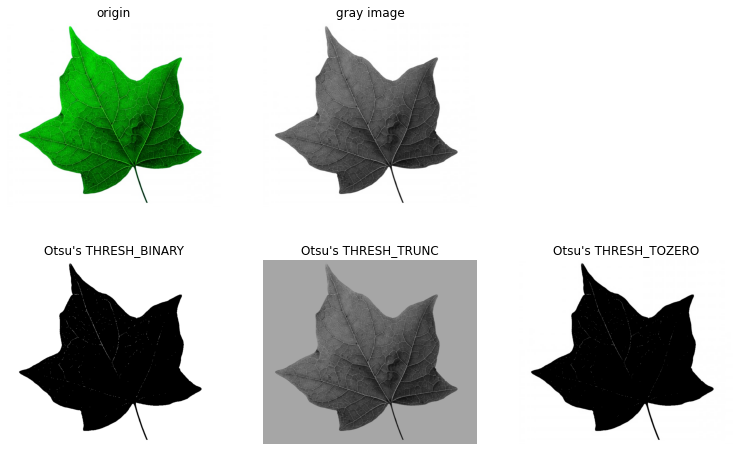

In [ ]:
#1. 일반 이미지
origin_img = cv2.imread(image_path)
gray_ori = cv2.cvtColor(origin_img,cv2.COLOR_BGR2GRAY)

thr_trunc = cv2.threshold(gray_ori,0,255,cv2.THRESH_TRUNC + cv2.THRESH_OTSU)[1]
thr_binary = cv2.threshold(gray_ori,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thr_tozero = cv2.threshold(gray_ori,0,255,cv2.THRESH_TOZERO + cv2.THRESH_OTSU)[1]

fig = plt.figure(figsize=(13,8))

show_img_with_matplotlib(origin_img,"origin",1)
show_img_with_matplotlib(cv2.cvtColor(gray_ori,cv2.COLOR_GRAY2BGR),"gray image",2)
show_img_with_matplotlib(cv2.cvtColor(thr_binary, cv2.COLOR_GRAY2BGR),"Otsu's THRESH_BINARY",4)
show_img_with_matplotlib(cv2.cvtColor(thr_trunc, cv2.COLOR_GRAY2BGR),"Otsu's THRESH_TRUNC",5)
show_img_with_matplotlib(cv2.cvtColor(thr_tozero, cv2.COLOR_GRAY2BGR),"Otsu's THRESH_TOZERO",6)

plt.show()

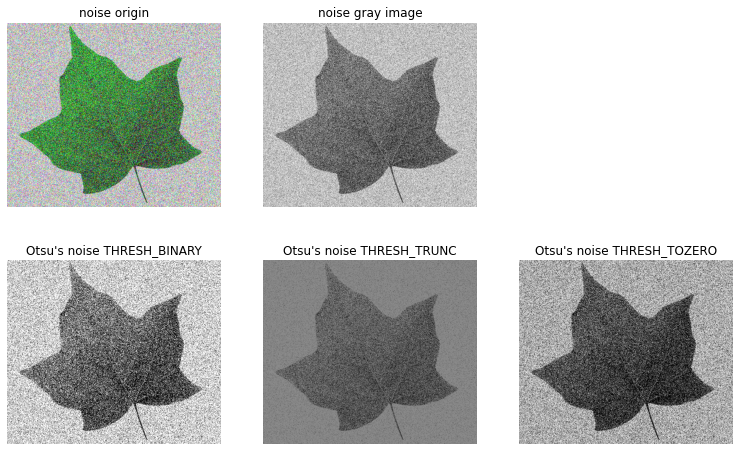

In [ ]:
#1-2 노이즈 있는 이미지
noise_img = cv2.imread(image_path_noised)
gray_noi = cv2.cvtColor(noise_img,cv2.COLOR_BGR2GRAY)

thr_trunc = cv2.threshold(gray_noi,0,255,cv2.THRESH_TRUNC + cv2.THRESH_OTSU)[1]
thr_binary = cv2.threshold(gray_noi,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thr_tozero = cv2.threshold(gray_noi,0,255,cv2.THRESH_TOZERO + cv2.THRESH_OTSU)[1]

fig = plt.figure(figsize=(13,8))

show_img_with_matplotlib(noise_img,"noise origin",1)
show_img_with_matplotlib(cv2.cvtColor(gray_noi,cv2.COLOR_GRAY2BGR),"noise gray image",2)
show_img_with_matplotlib(cv2.cvtColor(thr_binary, cv2.COLOR_GRAY2BGR),"Otsu's noise THRESH_BINARY",4)
show_img_with_matplotlib(cv2.cvtColor(thr_trunc, cv2.COLOR_GRAY2BGR),"Otsu's noise THRESH_TRUNC",5)
show_img_with_matplotlib(cv2.cvtColor(thr_tozero, cv2.COLOR_GRAY2BGR),"Otsu's noise THRESH_TOZERO",6)

plt.show()

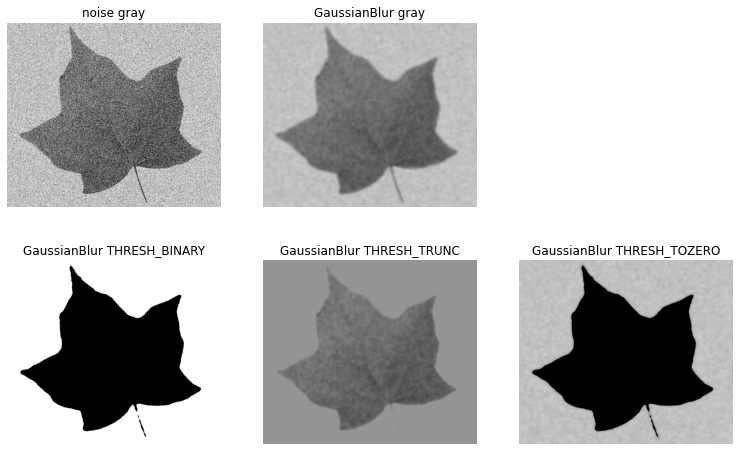

In [ ]:
#2 가우시안 필터를 적용한 결과
noise_blur = cv2.GaussianBlur(gray_noi,(25,25),0)

thr_trunc = cv2.threshold(noise_blur,0,255,cv2.THRESH_TRUNC + cv2.THRESH_OTSU)[1]
thr_binary = cv2.threshold(noise_blur,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thr_tozero = cv2.threshold(noise_blur,0,255,cv2.THRESH_TOZERO + cv2.THRESH_OTSU)[1]

fig = plt.figure(figsize=(13,8))

show_img_with_matplotlib(cv2.cvtColor(gray_noi,cv2.COLOR_GRAY2BGR),"noise gray",1)
show_img_with_matplotlib(cv2.cvtColor(noise_blur,cv2.COLOR_GRAY2BGR),"GaussianBlur gray",2)
show_img_with_matplotlib(cv2.cvtColor(thr_binary, cv2.COLOR_GRAY2BGR),"GaussianBlur THRESH_BINARY",4)
show_img_with_matplotlib(cv2.cvtColor(thr_trunc, cv2.COLOR_GRAY2BGR),"GaussianBlur THRESH_TRUNC",5)
show_img_with_matplotlib(cv2.cvtColor(thr_tozero, cv2.COLOR_GRAY2BGR),"GaussianBlur THRESH_TOZERO",6)

plt.show()

Otsu 알고리즘으로 인해 이미지의 색 분포도가 높은 색이 임계값으로 정해진다.


이때, THRESH_BINARY는 임계값을 넘으면 maxvalue인 255로, 넘지 않으면 0으로 처리한다. 따라서 임
계값 전후로 0또는 255로 처리되므로 시각적으론 노이즈가 더 심해보이나 물체의 경계나 명암이 뚜렷
해 보이게 된다.


THRESH_TRUNC는 임계값을 넘으면 임계값으로 아니면 그대로 유지하도록 처리한다. 따라서 노이즈는
덜해보이나 경계나 명암(이 사진에선 잎맥)이 흐릿해진다.


THRESH_TOZERO는 임계값을 넘으면 그대로, 넘지 않으면 0으로 처리한다. 따라서 물체와 배경간의 경
계는 뚜렷해지지만 물체의 명암(잎맥)의 구분이 어려워진다.

### 문제 2 
위의 노이즈가 있는 영상에 가우시안 필터링을 사용하는 경우, otsu's binarization 과 triangle ninarization 방법론의 성능의 소요 시간을 측정하고, 간단하게 결과를 정리하시오. 시간을 분석할 때는, 필터링 시간은 따로 측정하여, 순수하게 각 방법론에 걸린 시간, 총 시간을 연계하여 분석하시오. 

otsu's average time (100 times) : 0.467
triangle's average time (100 times) : 0.459


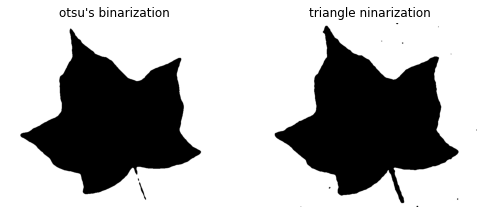

In [ ]:
otsu_time_sum = 0.0
tri_time_sum =0.0

for i in range(0,100):
  st = time.time()
  ostu = cv2.threshold(noise_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
  otsu_time_sum += (time.time()-st)*1000

  st = time.time()
  tri = cv2.threshold(noise_blur,0,255,cv2.THRESH_BINARY +cv2.THRESH_TRIANGLE)[1]
  tri_time_sum += (time.time()-st)*1000

print("otsu's average time (100 times) : {0:0.3f}".format(otsu_time_sum/100))
print("triangle's average time (100 times) : {0:0.3f}".format(tri_time_sum/100))

fig = plt.figure(figsize=(13,8))

show_img_with_matplotlib(cv2.cvtColor(ostu,cv2.COLOR_GRAY2BGR),"otsu's binarization",1)
show_img_with_matplotlib(cv2.cvtColor(tri,cv2.COLOR_GRAY2BGR),"triangle ninarization",2)

otsu 방법론이 배경에 노이즈가 없이 깔끔히 처리되나 나뭇잎 줄기 부분을 보면 알듯이 희미해보인다. 시간적 성능은 triangle이 더 좋으나 배경에 노이즈가 존재하는 것을 확인할 수 있다.